In [3]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/covid_19_india.csv')

# Display the first 5 rows
df.head()


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [6]:
# Check for missing values in each column
print(df.isnull().sum())

# Drop columns we don't need (like SNo or any irrelevant columns)
df = df.drop(['Sno'], axis=1)

# Check if there are duplicate rows
print("Duplicate rows:", df.duplicated().sum())

# Remove duplicate rows if any
df = df.drop_duplicates()

# Check data types and info
df.info()
# Convert 'Date' column to proper datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Confirm the change
df.dtypes



Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64


KeyError: "['Sno'] not found in axis"

In [7]:
# Convert 'Date' to datetime automatically (let pandas detect the format)
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes



,0
Date,datetime64[ns]
Time,object
State/UnionTerritory,object
ConfirmedIndianNational,object
ConfirmedForeignNational,object
Cured,int64
Deaths,int64
Confirmed,int64


In [8]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Confirm changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      18110 non-null  datetime64[ns]
 1   Time                      18110 non-null  object        
 2   State/UnionTerritory      18110 non-null  object        
 3   ConfirmedIndianNational   18110 non-null  object        
 4   ConfirmedForeignNational  18110 non-null  object        
 5   Cured                     18110 non-null  int64         
 6   Deaths                    18110 non-null  int64         
 7   Confirmed                 18110 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 1.1+ MB


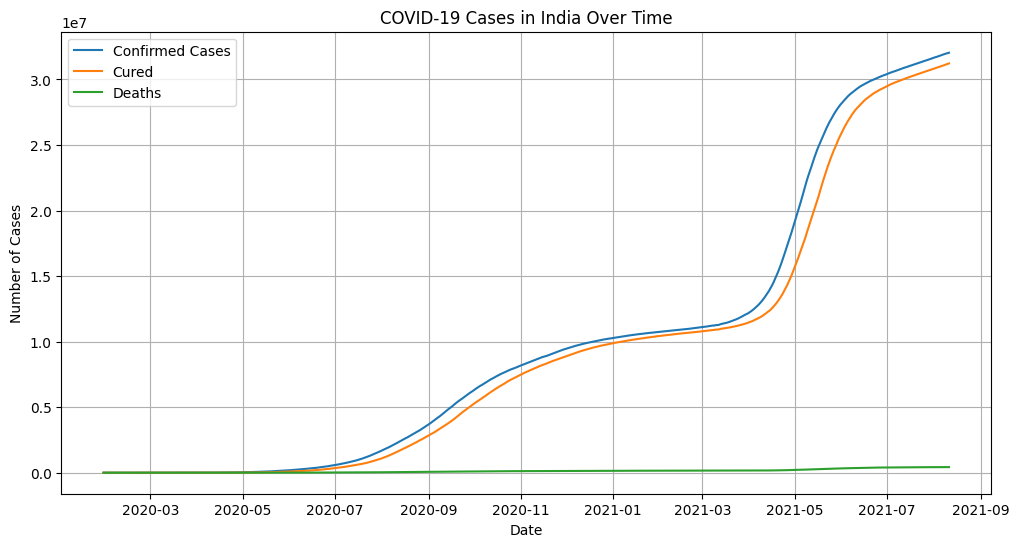

In [9]:
# Group by date and sum the cases
daily_cases = df.groupby('Date')[['Confirmed', 'Cured', 'Deaths']].sum().reset_index()

# Show first few rows
daily_cases.head()
import matplotlib.pyplot as plt

# Plotting total confirmed cases over time
plt.figure(figsize=(12,6))
plt.plot(daily_cases['Date'], daily_cases['Confirmed'], label='Confirmed Cases')
plt.plot(daily_cases['Date'], daily_cases['Cured'], label='Cured')
plt.plot(daily_cases['Date'], daily_cases['Deaths'], label='Deaths')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases in India Over Time')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-10-fa176836cb74>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Confirmed', y='State/UnionTerritory', data=top_states, palette='Reds_r')


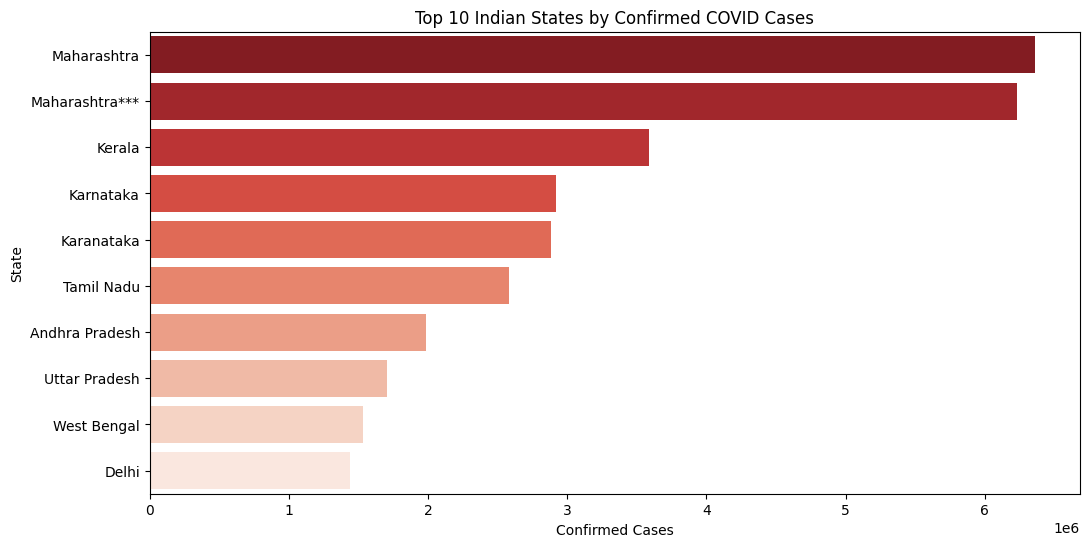

In [10]:
# Get the latest data for each state (last entry for each)
latest = df.sort_values('Date').groupby('State/UnionTerritory').last().reset_index()

# Sort states by confirmed cases
top_states = latest.sort_values('Confirmed', ascending=False).head(10)
top_states[['State/UnionTerritory', 'Confirmed', 'Cured', 'Deaths']]
import seaborn as sns

# Set plot size
plt.figure(figsize=(12,6))

# Create a bar plot
sns.barplot(x='Confirmed', y='State/UnionTerritory', data=top_states, palette='Reds_r')
plt.title('Top 10 Indian States by Confirmed COVID Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('State')
plt.show()


<ipython-input-11-22499f952df1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Death Rate (%)', y='State/UnionTerritory', data=top_death_rate, palette='Greys_r')


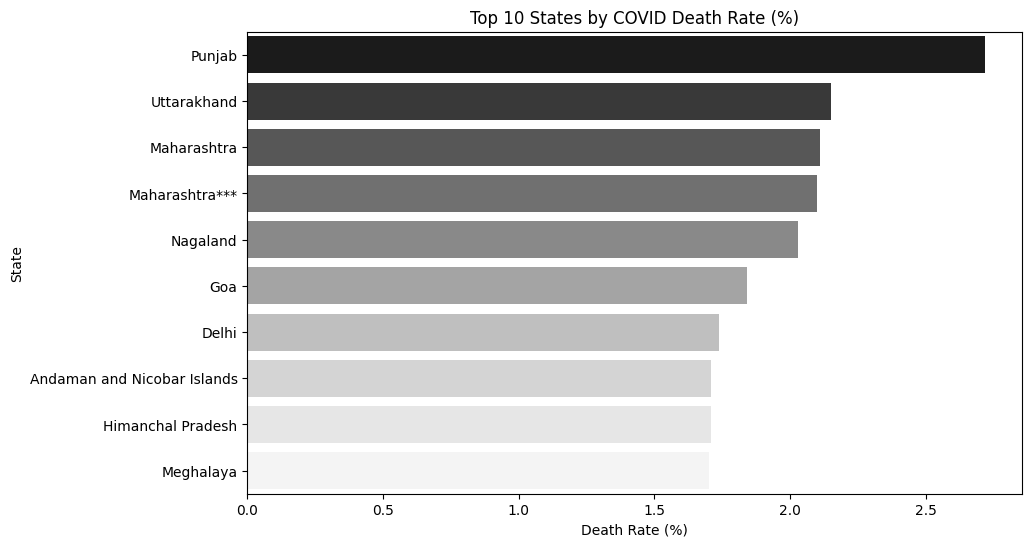

In [11]:
# Add recovery and death rates to the latest data
latest['Recovery Rate (%)'] = round((latest['Cured'] / latest['Confirmed']) * 100, 2)
latest['Death Rate (%)'] = round((latest['Deaths'] / latest['Confirmed']) * 100, 2)

# Show top 10 states by death rate
latest.sort_values('Death Rate (%)', ascending=False)[['State/UnionTerritory', 'Death Rate (%)']].head(10)
# Top 10 states by death rate
top_death_rate = latest.sort_values('Death Rate (%)', ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Death Rate (%)', y='State/UnionTerritory', data=top_death_rate, palette='Greys_r')
plt.title('Top 10 States by COVID Death Rate (%)')
plt.xlabel('Death Rate (%)')
plt.ylabel('State')
plt.show()
